In [6]:
import numpy as np
import matplotlib.pyplot as plt

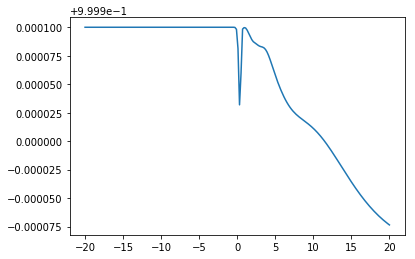

In [90]:
def activation_func(inputs): 
    return 1.0/(1.0+np.exp(-inputs))

nn_inputs = np.linspace(-20,20,200)[:, np.newaxis]
nn_weights1 = np.random.randn(1,1000)
nn_weights2 = np.random.randn(1000,500)
nn_weights3 = np.random.randn(500,1)
h1 = activation_func(np.dot(nn_inputs,nn_weights1))
h2 = activation_func(np.dot(h1,nn_weights2))
f = activation_func(np.dot(h2,nn_weights3))
plt.plot(nn_inputs, f)
plt.show()

In [158]:
from ipywidgets import interact_manual

@interact_manual
def plot_nn_contour():
    nn1 = np.linspace(-5,5,200)[:, np.newaxis]
    mgrid = np.meshgrid(nn1, nn1)
    nn_inputs = np.stack(mgrid).reshape(2,-1).T
    nn_weights1 = np.random.randn(2,100)
    nn_weights2 = np.random.randn(100,50)
    nn_weights3 = np.random.randn(50,1)
    h1 = activation_func(np.dot(nn_inputs,nn_weights1))
    h2 = activation_func(np.dot(h1,nn_weights2))
    f = activation_func(np.dot(h2,nn_weights3))
    z = f.reshape(200,200)
    plt.figure(figsize=(12,12))
    plt.contourf(mgrid[0], mgrid[1], z, levels=40, cmap='Reds');

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…